# Deep Learning With Python: Ch. 7

**Advanced deep-learning best practices**

<br>

---
## Tópicos
* Técnicas de Programação
  - Funções _Callback_
  - Programação Orientada a Objetos: Classes e Herança
* API de _callback_ do Keras
* Boas Práticas em Deep Learning
* Aplicações
  - Implementação do Concrete Dropout usando Keras
  - Fitsbook (projeto próprio)
---

# Callbacks

### 1. No Python, toda função é um objeto de primeira ordem

In [14]:
def q(x):
  return x ** 2

def p(x, func):
  print('O quadrado de', x, 'é', func(x))

p(2, q)

O quadrado de 2 é 4


### 2. Fluxo de um programa

In [18]:
import time

def fit(lr):
  print('Inicio', lr)
  time.sleep(3)
  print('Fim', lr)

lr = 3
fit(lr)
lr = 5
fit(lr)

Inicio 3
Fim 3
Inicio 5
Fim 5


### 3. Implementação de um callback

In [29]:
def fit(func):
  model = {
      'lr': 100,
      'epoch': 0
  }

  print('Estado Inicial', model)

  for i in range(10):
    lr = func(model)
    time.sleep(2)
    model['epoch'] = model['epoch'] + 1
    print(model)
  
def dynamic_lr(m):
  m['lr'] = m['lr'] / 2.
  
fit(dynamic_lr)

Estado Inicial {'lr': 100, 'epoch': 0}
{'lr': 10.0, 'epoch': 1}
{'lr': 1.0, 'epoch': 2}
{'lr': 0.1, 'epoch': 3}
{'lr': 0.01, 'epoch': 4}
{'lr': 0.001, 'epoch': 5}
{'lr': 0.0001, 'epoch': 6}
{'lr': 1e-05, 'epoch': 7}
{'lr': 1.0000000000000002e-06, 'epoch': 8}
{'lr': 1.0000000000000002e-07, 'epoch': 9}
{'lr': 1.0000000000000002e-08, 'epoch': 10}


# Programação Orientada a Objetos

## Classes: Visão Geral

Estrutura de dados que associa um conjunto de funções a um estado.

### Exemplo: Definindo e criando instâncias de classes

In [33]:
class Bolo:
  def __init__(self):
    self.ingrediente = []
    self.cobertura = ''
    self.assado = False
    self.restante = 1
  
  def assar(self):
    self.assado = True
    print('Bolo Assado')
  
  def colocar_cobertura(self, cobertura):
    self.cobertura = cobertura

  def comer(self):
    if (self.restante >= .5):
      self.restante = self.restante - .5
      print('Hmmmm..')
    else:
      print('O bolo Acabou!!')

bolo1 = Bolo()
bolo1.cobertura = 'chocolate'
bolo1.ingredientes = ['farinha', 'ovo']


bolo1.comer()
print(bolo1.restante)

bolo2 = Bolo()
bolo2.comer()
bolo2.comer()
print(bolo2.restante)

Hmmmm..
0.5
Hmmmm..
Hmmmm..
0.0


## Classes: Herança

Uma forma de incorporar métodos e atributos de uma classe para outras classes. Garante a padronização do código.

### Exemplo: Herança

In [41]:
class Animal:
  def __init__(self, pes, voa):
    self.pes = pes
    self.voa = voa

  def comer(self):
    print('Comendo...')

  def beber(self):
    print('Bebendo...')

class Cachorro(Animal):
  def __init__(self):
    super(Cachorro, self).__init__(4, False)
  
  def comer(self):
    print('Ração')

  def latir(self):
    print('Au Au')

c = Cachorro()
c.comer()
c.beber()

Ração
Bebendo...


### Exemplo: Unindo de classe e callback

# API de Callbacks do Keras

Quando se trabalha com um grande conjunto de dados e uma rede neural complexa treinando por um número alto de épocas, esperar o término da execução dos métodos **compile** e **fit** (principalmente) torna-se improdutivo, pelo alto investimento de tempo.

Os callbacks ajudam a ter maior controle sobre o fluxo do programa.

## Aplicação 1 - Fitsbook

[Link do site](https://nmcardoso.github.io/fitsbook)

### Treinamento de exemplo: identificar digitos do MNIST

In [0]:
import random
import tensorflow as tf
import numpy as np
from keras import backend as K
import os

from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import callbacks

import matplotlib.pyplot as plt

!pip3 install git+https://github.com/nmcardoso/fitsbook-python
import fitsbook as fb

In [0]:
dense_model = models.Sequential()
dense_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dense_model.add(layers.Dense(10, activation='softmax'))
dense_model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_model.summary()

In [0]:
(dense_train_img, dense_train_lbl), (dense_test_img, dense_test_lbl) = mnist.load_data()
dense_train_img = dense_train_img.reshape((60000, 28 * 28))
dense_train_img = dense_train_img.astype('float32') / 255

dense_test_img = dense_test_img.reshape((10000, 28 * 28))
dense_test_img = dense_test_img.astype('float32') / 255

dense_train_lbl = to_categorical(dense_train_lbl)
dense_test_lbl = to_categorical(dense_test_lbl)

In [0]:
%%time
dense_history = dense_model.fit(dense_train_img,
                                dense_train_lbl, 
                                epochs=10, 
                                batch_size=128,
                                validation_split=0.17,
                                callbacks=[fb.callbacks.FitsbookCallback()],
                                validation_data=(dense_test_img, dense_test_lbl))

In [0]:
def plot_figure(history):
  epochs = history.epoch
  plt.figure(figsize=(10, 6.5))
  plt.plot(epochs, history.history['acc'], linestyle='--', color='blue', label='Train Acc')
  plt.plot(epochs, history.history['val_acc'], color='blue', label='Validation Acc')
  plt.plot(epochs, history.history['loss'], linestyle='--', color='green', label='Train Loss')
  plt.plot(epochs, history.history['val_loss'], color='green', label='Validation Loss')
  plt.grid(b=True)
  plt.title('Dense Layers Metrics', fontsize=17)
  plt.ylabel('Metrics', fontsize=13)
  plt.xlabel('Epoch', fontsize=13)
  plt.legend(fontsize='large')
  plt.show()
plot_figure(dense_history)

### Eventos

* on_batch_begin
* on_batch_end
* on_epoch_begin
* on_epoch_end
* on_train_begin
* on_train_end



### Implementações

* [Keras - Módulo Callback](https://github.com/keras-team/keras/blob/master/keras/callbacks/callbacks.py#L118-L269)
* [Keras - Função train-loop](https://github.com/keras-team/keras/blob/1cf5218edb23e575a827ca4d849f1d52d21b4bb0/keras/engine/training_arrays.py#L144-L218)
* [FitsbookPython - Classe Callback](https://github.com/nmcardoso/fitsbook-python/blob/master/fitsbook/callbacks.py)

## Aplicação 2 - Concrete Dropout

* [Artigo teórico](http://papers.neurips.cc/paper/6949-concrete-dropout.pdf)
* [Artigo com implementação](https://arxiv.org/pdf/1705.07832.pdf)
* [Keras - Classe Wrapper](https://github.com/keras-team/keras/blob/5be4ed3d9e7548dfa9d51d1d045a3f951d11c2b1/keras/layers/wrappers.py#L19-L113)

# Deep-learning best practices


### 1. Batch Normalization

Normalizar seus dados de entrada para um intervalo e centrar os dados em zero.

### 2. Depthwise separable convolution

Se as localizações da imagem estão correlacionadas, mas os canais puderem ser interpretados idependentemente, faz sentido separar as camadas de convolução por canal e juntá-las depois.


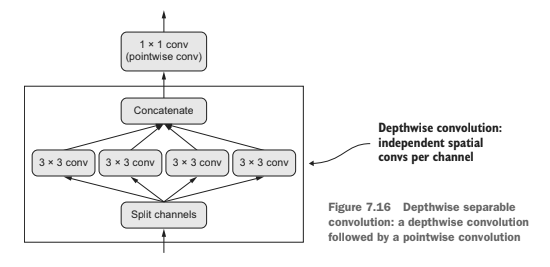

### 3. Hyperparameter Optimization

Quando se desenvolve uma projeta uma rede neural, muitas decisões arbitrárias são tomadas. _Quantas camadas empilhar? Quantas unidades ou filtros devem ir em cada camada? Devo usar ``relu`` ou outra função de ativação? Quanto dropout devo usar?_

Na prática, uma boa intuição de otimização de hiperparâmetros é construída através de várias experiências no decorrer do tempo. As decisões iniciais serão sempre subotimizadas até que se desenvolva uma boa intuição de como ajustar os hiperparâmetros.

As ferramentas abaixo otimizam os hiperparâmetros automaticamente
* Hyperopt - https://github.com/hyperopt/hyperopt
* Hyperas - https://github.com/maxpumperla/hyperas

### 4. Model Ensembling

Compor a predição final usando predições parciais de vários modelos.

```python
preds_a = model_a.predict(x_val)
preds_b = model_b.predict(x_val)
preds_c = model_c.predict(x_val)
preds_d = model_d.predict(x_val)
final_preds = 0.5 * preds_a + 0.25 * preds_b + 0.1 * preds_c + 0.15 * preds_d
```